In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from voronoi_polygons import polygons as voronoi_polygons

In [2]:
%matplotlib inline

In [3]:
cereals = pd.read_csv("cereals.csv", index_col=0)

In [4]:
missing =[]
for column in cereals.columns:
    missing.extend(list(cereals.loc[cereals[column] == -1].index.values))
set(missing)

{'Almond_Delight', 'Cream_of_Wheat_(Quick)', 'Quaker_Oatmeal'}

In [5]:
cereals = cereals.replace(-1, np.nan)

In [6]:
cereals.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269


In [12]:
lr = LinearRegression()
lr.fit(cereals.dropna()[["fiber"]],cereals.dropna()[["potass"]])
print("Almond Delight Fiber Content: {}".format(cereals.xs("Almond_Delight")["fiber"]))
print()
print("Cream of Wheat Fiber Content: {}".format(cereals.xs("Cream_of_Wheat_(Quick)")["fiber"]))

Almond Delight Fiber Content: 1.0

Cream of Wheat Fiber Content: 1.0


In [15]:
%%capture
potassium = lr.predict(1)[0][0]
cereals["potass"]["Almond_Delight"] = potassium
cereals["potass"]["Cream_of_Wheat_(Quick)"] = potassium

In [18]:
cereals = cereals.fillna(cereals.mean())

In [20]:
cereals = cereals.drop(["mfr", "type", "shelf"], axis=1)

In [21]:
cereals = cereals.div(cereals.weight, axis="index")

In [23]:
data = preprocessing.scale(cereals)
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [25]:
clusters = kmeans.predict(data)
groups = cereals.join(pd.DataFrame(clusters, index=cereals.index)).sort(0)

In [26]:
pd.set_option('display.max_rows', len(groups)) 
groups

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,0
name,,,,,,,,,,,,
"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",96.000000,2.400000,1.600000,128.000000,4.000000,9.600000,8.000000,160.000000,20.000000,1,0.536000,0
Grape_Nuts_Flakes,100.000000,3.000000,1.000000,140.000000,3.000000,15.000000,5.000000,85.000000,25.000000,1,0.880000,0
Grape-Nuts,110.000000,3.000000,0.000000,170.000000,3.000000,17.000000,3.000000,90.000000,25.000000,1,0.250000,0
Crispy_Wheat_&_Raisins,100.000000,2.000000,1.000000,140.000000,2.000000,11.000000,10.000000,120.000000,25.000000,1,0.750000,0
Great_Grains_Pecan,120.000000,3.000000,3.000000,75.000000,3.000000,13.000000,4.000000,100.000000,25.000000,1,0.330000,0
Raisin_Squares,90.000000,2.000000,0.000000,0.000000,2.000000,15.000000,6.000000,110.000000,25.000000,1,0.500000,0
Cracklin'_Oat_Bran,110.000000,3.000000,3.000000,140.000000,4.000000,10.000000,7.000000,160.000000,25.000000,1,0.500000,0
Raisin_Nut_Bran,100.000000,3.000000,2.000000,140.000000,2.500000,10.500000,8.000000,140.000000,25.000000,1,0.500000,0
Raisin_Bran,90.225564,2.255639,0.751880,157.894737,3.759398,10.526316,9.022556,180.451128,18.796992,1,0.563910,0


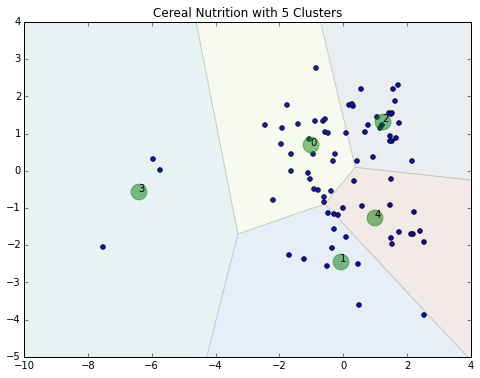

In [27]:
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

clusters = pca.transform(kmeans.cluster_centers_)
labels = list(set(kmeans.labels_))


plt.figure(figsize=(8, 6))
axes = plt.subplot(1,1,1)

for i in range(pca_2d.shape[0]):
    plt.scatter(pca_2d[i,0], pca_2d[i, 1])
    
for i in range(clusters.shape[0]):
    plt.scatter(clusters[i, 0], clusters[i, 1], color='g', alpha='0.5', s=250, marker='o')
    plt.annotate(labels[i], (clusters[i, 0],clusters[i, 1]))

plt.title("Cereal Nutrition with 5 Clusters")

polys = voronoi_polygons(clusters)

for poly in polys:
    p = matplotlib.patches.Polygon(poly, facecolor=np.random.rand(3,1), alpha=0.1)
    axes.add_patch(p)
    
plt.show()

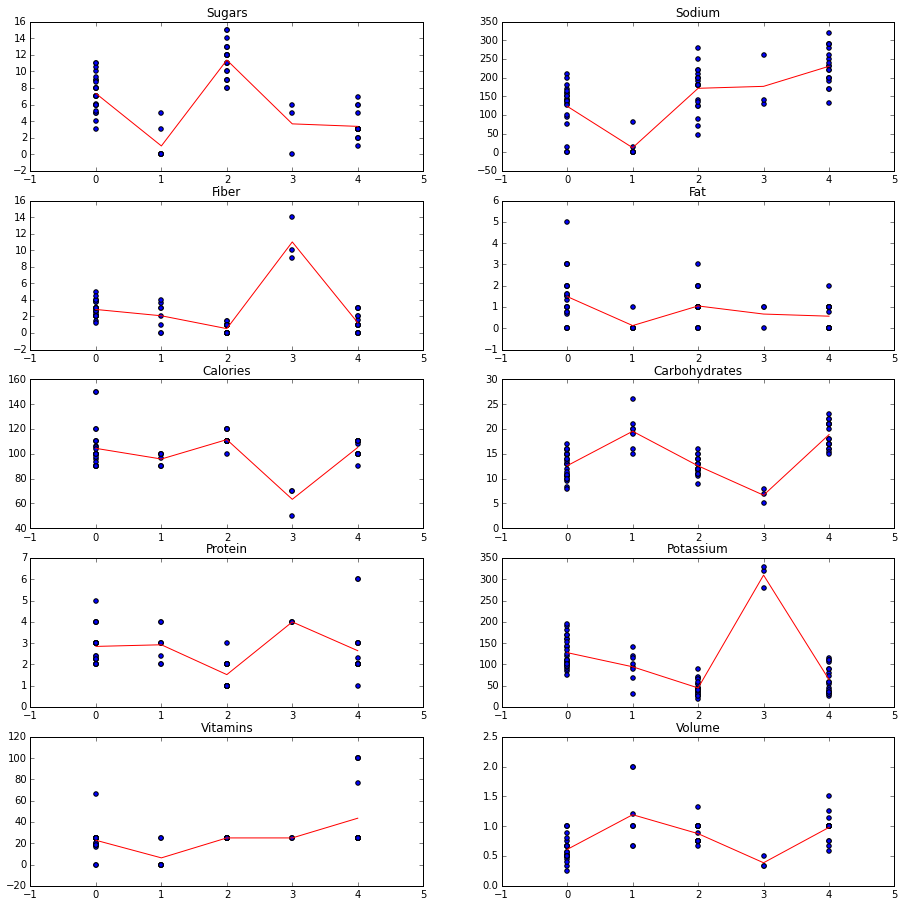

In [28]:
plt.subplot(5,2,1)
plt.scatter(groups[0], groups["sugars"])
plt.plot(groups.groupby(0).mean()["sugars"], color="r")
plt.title("Sugars")

plt.subplot(5,2,2)
plt.scatter(groups[0], groups["sodium"])
plt.plot(groups.groupby(0).mean()["sodium"], color="r")
plt.title("Sodium")

plt.subplot(5,2,3)
plt.scatter(groups[0], groups["fiber"])
plt.plot(groups.groupby(0).mean()["fiber"], color="r")
plt.title("Fiber")

plt.subplot(5,2,4)
plt.scatter(groups[0], groups["fat"])
plt.plot(groups.groupby(0).mean()["fat"], color="r")
plt.title("Fat")

plt.subplot(5,2,5)
plt.scatter(groups[0], groups["calories"])
plt.plot(groups.groupby(0).mean()["calories"], color="r")
plt.title("Calories")

plt.subplot(5,2,6)
plt.scatter(groups[0], groups["carbo"])
plt.plot(groups.groupby(0).mean()["carbo"], color="r")
plt.title("Carbohydrates")

plt.subplot(5,2,7)
plt.scatter(groups[0], groups["protein"])
plt.plot(groups.groupby(0).mean()["protein"], color="r")
plt.title("Protein")

plt.subplot(5,2,8)
plt.scatter(groups[0], groups["potass"])
plt.plot(groups.groupby(0).mean()["potass"], color="r")
plt.title("Potassium")

plt.subplot(5,2,9)
plt.scatter(groups[0], groups["vitamins"])
plt.plot(groups.groupby(0).mean()["vitamins"], color="r")
plt.title("Vitamins")

plt.subplot(5,2,10)
plt.scatter(groups[0], groups["cups"])
plt.plot(groups.groupby(0).mean()["cups"], color="r")
plt.title("Volume")


plt.subplots_adjust(left=1, right=3, top=4, bottom=1)
plt.show()

#Groups



##Group 0: Fruit-Added
- Fairly high sugar (probably from fruit in most cases)
- Fairly high sodium
- Fiber higher than group 2 (which also has high sugar)
- Decently high potassium

##Group 1: Low-Density Carbs (Not much there)
- High volume/weight ratio (low density)
- Low Sugar
- Low Sodium
- Somewhat lower calories
- High carbohydrates


##Group 2: Sugar Bombs
- Highest sugar
- High sodium
- Low fiber
- High calories
- Low potassium

##Group 3: Super-Fiber
- Very high fiber
- Very high potassium
- Low carbohydrates
- Low calories
- Low volume/weight ratio (high density)
- Small group (only three members)

##Group 4: Run of the (General) Mill
- Middling sugar, fiber, calories
- High sodium
- High carbohydrates
- Somewhat high volume/weight ratio (lower density)